Linear Regression Example by Prof. B. Hosseini.

In [4]:
import numpy as np
import numpy.matlib 
import matplotlib.pyplot as plt

In [13]:
# generate some random input data in 2D
N1 = 100
N2 = 60

C1 = [[0.5, 0.25], [0.25, 1]]
C2 = [[0.6, 0.4], [0.4, 0.5]]

M1 = np.matlib.repmat( np.array([[-1], [0]]), 1, N1 ) # (-1, 0; -1, 0; ...; -1, 0)
M2 = np.matlib.repmat( np.array([[0], [0.1]]), 1, N2 ) # # (0, 0.1; 0, 0.1; ...; 0, 0.1)
# print(M1)
# print(M2)

X1 = np.random.randn(2,N1)
X2 = np.random.randn(2,N2)

X = np.concatenate( (np.dot(C1, X1) + M1,  np.dot(C2, X2) + M2), axis=1)
print(np.shape(X))

Y = np.zeros((N1+N2))
Y[0:N1] = +1
Y[N1+1:None] = -1


(2, 160)


Text(0, 0.5, '$x_1$')

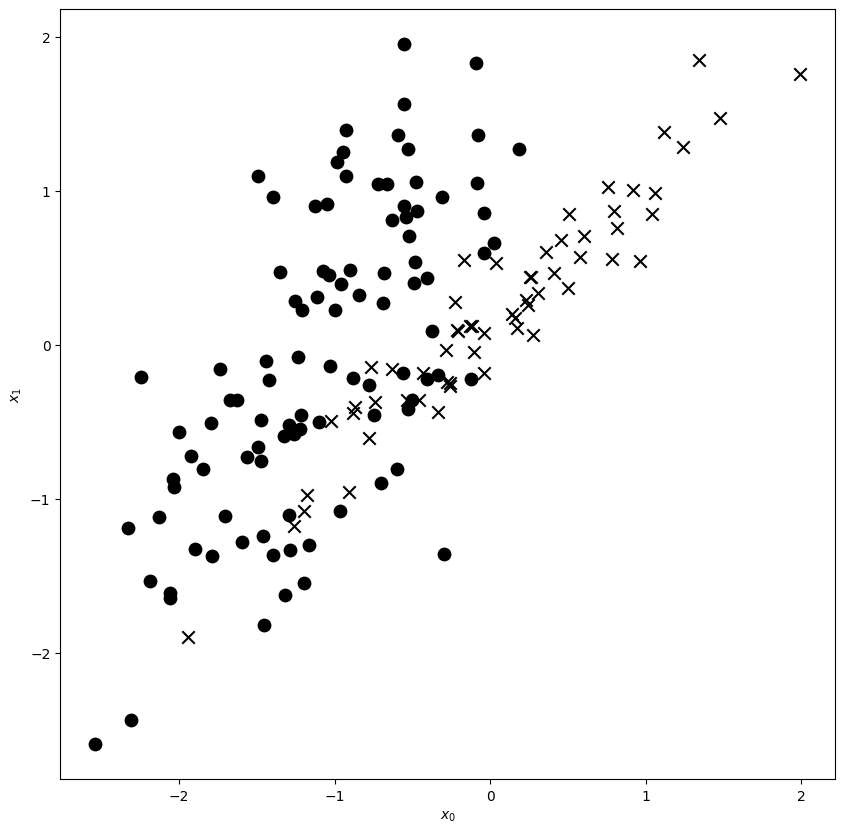

In [14]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

ax.scatter(X[0,0:N1], X[1,0:N1], s=80, marker='o', c='k')
ax.scatter(X[0,N1+1:None], X[1,N1+1:None], s=80, marker='x', c='k')
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')

We will now train a regression model of the form 
$$f(x_0, x_1) = \beta_0 + \beta_1 x_0 + \beta_2 x_1$$
In order to distinguish (classify) the dots and crosses in the plot.  

In [15]:
A = np.concatenate(( np.ones((N1+N2,1)), np.transpose(X)), axis = 1)

sol = np.linalg.lstsq( A, np.transpose(Y), rcond=None ) # see manual

beta= sol[0]

print(beta) # these are beta_0 and beta_1 respectively

[-0.44006353 -1.05076029  0.50862796]


We can now use the sign of $f$ as a predictor of what class a new point belongs to. This suggests the zero level set, i.e., $f(x_1, x_2) = 0$ as our *decision boundary*. This is nothing but a line with equation $x_1 = -\frac{\beta_0 + \beta_1 x_0}{\beta_2}$ which we can plot.  

(-3.0, 3.0)

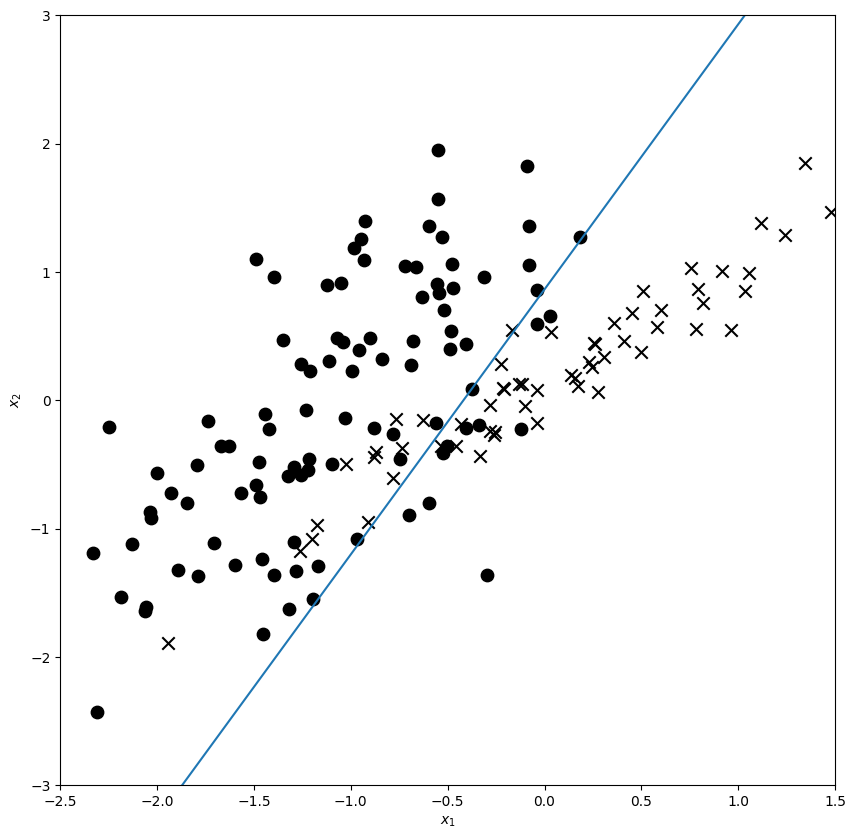

In [19]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

ax.scatter(X[0,0:N1], X[1,0:N1], s= 80, marker='o', c='k')
ax.scatter(X[0,N1+1:None], X[1,N1+1:None], s=80, marker='x', c='k')
ax.plot( [-3, 2], [-(beta[0] + beta[1]*(-3))/beta[2], -(beta[0] + beta[1]*(2))/beta[2]   ] )
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_xlim(-2.5, 1.5)
ax.set_ylim(-3, 3)